In [1]:
import xgboost
import pandas as pd
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:50:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|===================| 32201/32561 [01:11<00:00]        

In [6]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [9]:
shap_values

.values =
array([[ 0.62066666, -0.43401289,  0.40111692, ..., -0.11033077,
        -0.09677086,  0.01754525],
       [ 1.13418911, -0.31901527,  0.59456016, ..., -0.18700682,
        -1.40943686,  0.01184286],
       [ 0.3439326 , -0.00987605, -0.36651412, ..., -0.12711806,
         0.02807141, -0.01081819],
       ...,
       [ 1.23991321, -0.01095367, -0.26346211, ..., -0.13327572,
        -0.03201352,  0.03547605],
       [-1.89771603, -0.05581235, -0.34632427, ..., -0.17873634,
        -1.41615893, -0.01343117],
       [ 1.00243924,  0.1468066 , -0.14676142, ..., -0.07620457,
         0.26474981,  0.01688919]])

.base_values =
array([-2.68469186, -2.68469186, -2.68469186, ..., -2.68469186,
       -2.68469186, -2.68469186])

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9.,

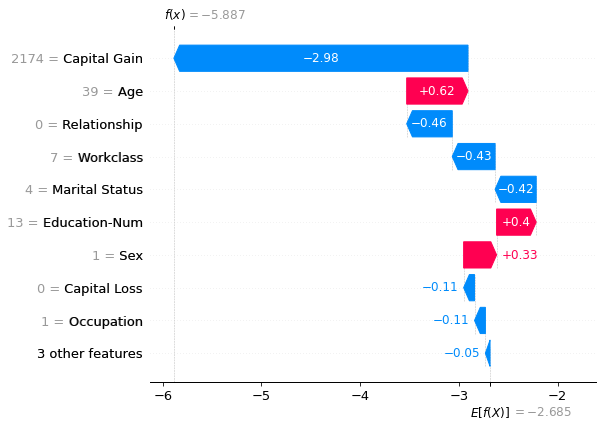

In [2]:
shap.plots.waterfall(shap_values[0])

In [10]:
shap_values[0]

.values =
array([ 0.62066666, -0.43401289,  0.40111692, -0.41627077, -0.11005206,
       -0.46145512,  0.03216866,  0.33387261, -2.97870277, -0.11033077,
       -0.09677086,  0.01754525])

.base_values =
-2.6846918617660775

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])